In [ ]:
import os
import numpy as np
import pandas as pd

In [145]:
#Chargement du fichier csv

# Chemin du fichier CSV
fichier ="consolidation_des_données1.csv"

# Charger le fichier CSV
df = pd.read_csv(fichier)

# Afficher les premières lignes du DataFrame
print(df.head())


                           Titre du bulletin (ANSSI)  \
0  Vulnérabilité dans VMware Spring Cloud Gateway...   
1         Vulnérabilité dans F5 BIG-IP (11 mai 2022)   
2  [MàJ] Vulnérabilité dans Atlassian Confluence ...   
3  Multiples vulnérabilités dans Microsoft Window...   
4  Multiples vulnérabilités dans Microsoft Window...   

               Date de publication  \
0  Thu, 03 Mar 2022 01:00:00 +0000   
1  Wed, 11 May 2022 02:00:00 +0000   
2  Fri, 03 Jun 2022 02:00:00 +0000   
3  Fri, 16 Sep 2022 02:00:00 +0000   
4  Fri, 16 Sep 2022 02:00:00 +0000   

                            Lien du bulletin (ANSSI) Type de bulletin  \
0  https://www.cert.ssi.gouv.fr/alerte/CERTFR-202...           alerte   
1  https://www.cert.ssi.gouv.fr/alerte/CERTFR-202...           alerte   
2  https://www.cert.ssi.gouv.fr/alerte/CERTFR-202...           alerte   
3  https://www.cert.ssi.gouv.fr/alerte/CERTFR-202...           alerte   
4  https://www.cert.ssi.gouv.fr/alerte/CERTFR-202...           alerte

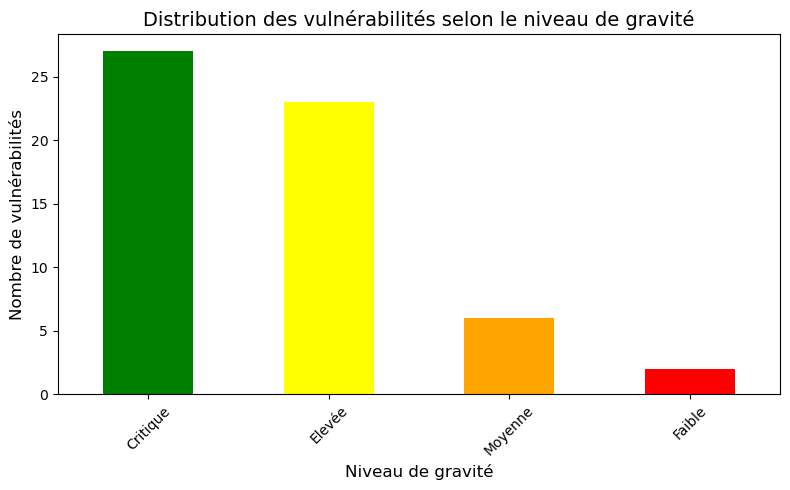

In [148]:
#1 Histogramme des scores CVSS

import matplotlib.pyplot as plt

# Supposons que 'df' soit le DataFrame contenant les données
# Filtrer les données pour exclure les "Non disponible"
df_filtered = df[df["Base severity"] != "Non disponible"]

# Compter les occurrences de chaque niveau de gravité
severity_counts = df_filtered["Base severity"].value_counts()

# Tracer l'histogramme
plt.figure(figsize=(8, 5))
severity_counts.plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])

# Ajouter des titres et labels
plt.title("Distribution des vulnérabilités selon le niveau de gravité", fontsize=14)
plt.xlabel("Niveau de gravité", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)

# Ajuster les labels de l'axe des x
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

# Interprétation:

Nous pouvons observer la concentration des vulnérabilités est beaucoup plus importante dans les catégories critiques et élevées.
Cela suggère que les efforts en matière de gestion des risques doivent prioritairement se concentrer sur ces deux niveaux de gravité.

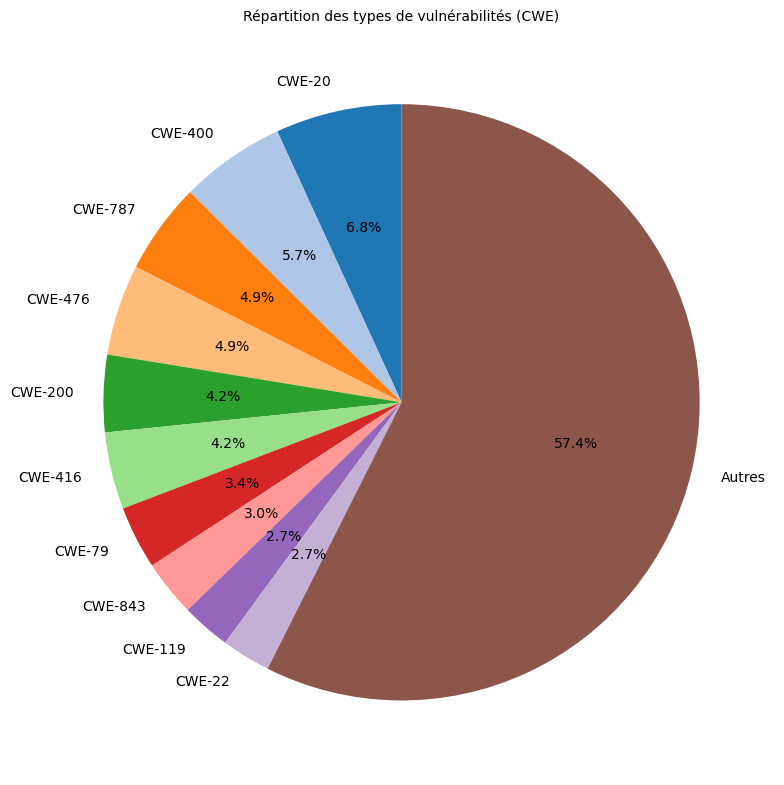

In [150]:
#%%2 Diagramme circulaire des types de vulnérabilités (CWE)

# Filtrer les vulnérabilités avec un type CWE valide
df_cwe_filtered = df[df["Type CWE"] != "Non disponible"]

# Compter les occurrences des types CWE
cwe_counts = df_cwe_filtered["Type CWE"].value_counts()

# Garder les 10 types les plus fréquents et regrouper les autres dans "Autres"
top_cwe = cwe_counts[:10]
other_cwe_count = cwe_counts[10:].sum()
top_cwe["Autres"] = other_cwe_count

# Créer le diagramme circulaire
plt.figure(figsize=(8, 8))
top_cwe.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.tab20.colors,  # Palette de couleurs
    labeldistance=1.1
)

# Ajouter un titre
plt.title("Répartition des types de vulnérabilités (CWE)", fontsize=10)

# Ajuster pour éviter les chevauchements
plt.ylabel("")  # Enlever l'étiquette de l'axe Y pour un affichage clair
plt.tight_layout()

# Afficher le graphique
plt.show()

# Interprétation 
Selon ce graphe , les CWE _20 reprèsente la plus grande variété de pourcentage .

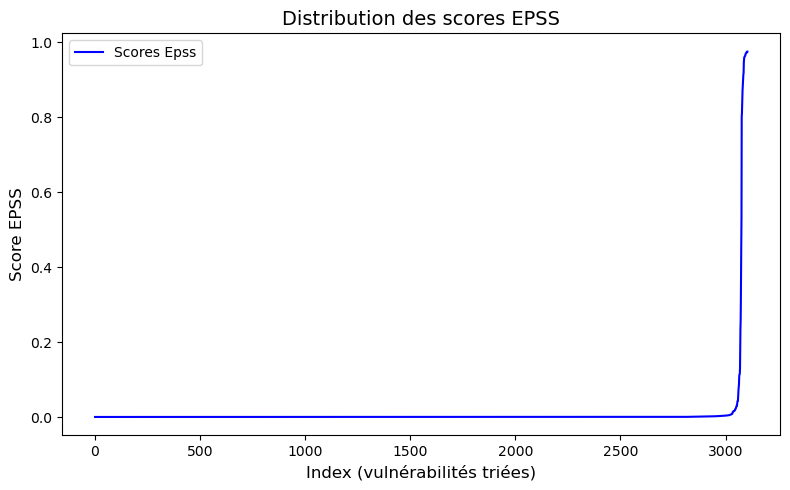

In [152]:
#%% 3 Courbe des scores EPSS

# Filtrer les données avec un score EPSS valide
df_epss_filtered = df[df["Score Epss"] != "Non disponible"]
df_epss_filtered["Score Epss"] = pd.to_numeric(df_epss_filtered["Score Epss"], errors="coerce")

# Trier les scores EPSS
df_epss_sorted = df_epss_filtered["Score Epss"].dropna().sort_values()

# Tracer la courbe
plt.figure(figsize=(8, 5))
plt.plot(df_epss_sorted.values, label="Scores Epss", color="blue")

# Ajouter des titres et labels
plt.title("Distribution des scores EPSS", fontsize=14)
plt.xlabel("Index (vulnérabilités triées)", fontsize=12)
plt.ylabel("Score EPSS", fontsize=12)

# Ajouter une légende
plt.legend()

# Afficher la courbe
plt.tight_layout()
plt.show()

# Interprétation

On observe que la majorité des vulnérabilités ont un score EPSS très faible, proche de Zéro .
Ce n'est qu'à partir du 2500 i -ème indice que la courbe s'élève brusquement, indiquant la présence de quelques vulnérabilités extrêmement critiques.
Un petit nombre de vulnérabilités sont responsables de la majorité des risques. Il est donc essentiel de les identifier et de les traiter en priorité.

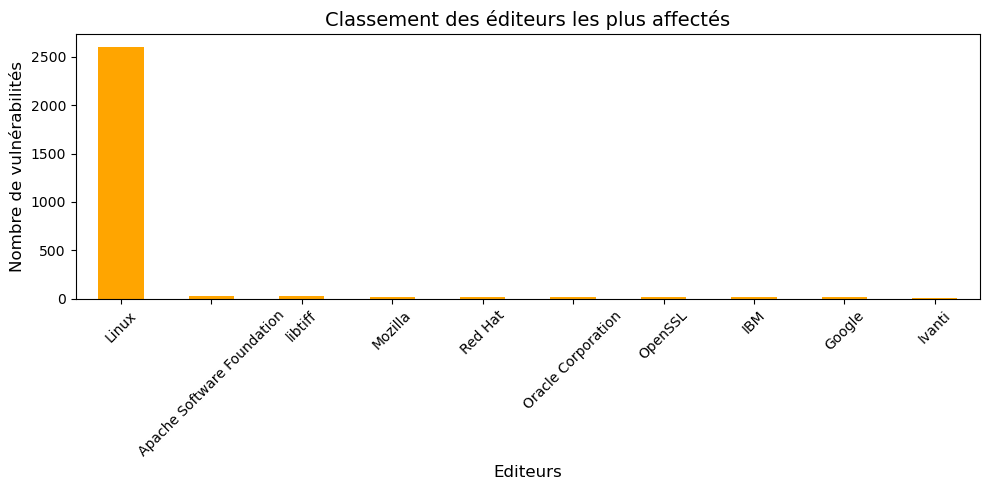

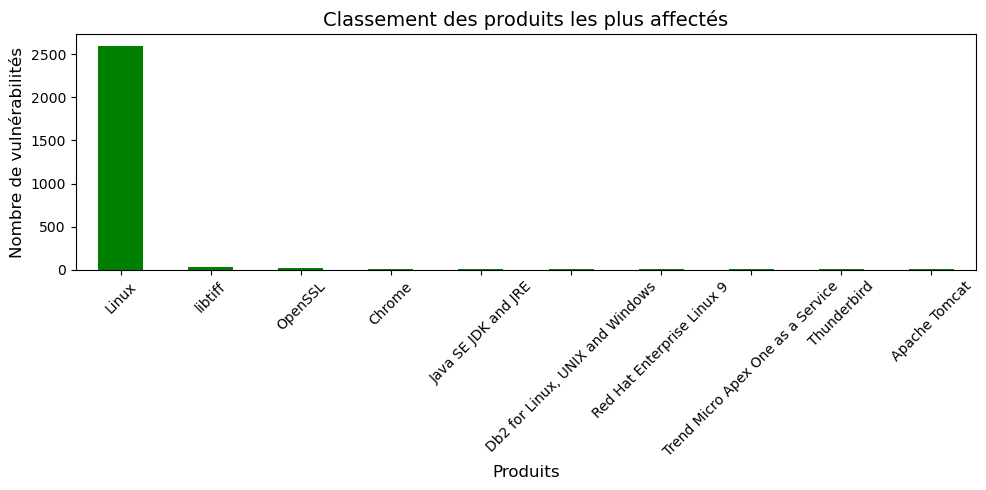

In [154]:
#%% 4
# Classement des éditeurs les plus affectés
df_valid_editors = df[df["Editeur"] != "Non disponible"]
editor_counts = df_valid_editors["Editeur"].value_counts().head(10)

# Classement des produits les plus affectés
df_valid_products = df[df["Produit"] != "Non disponible"]
product_counts = df_valid_products["Produit"].value_counts().head(10)

# Visualisation des éditeurs les plus affectés
plt.figure(figsize=(10, 5))
editor_counts.plot(kind="bar", color="orange")
plt.title("Classement des éditeurs les plus affectés", fontsize=14)
plt.xlabel("Editeurs", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisation des produits les plus affectés
plt.figure(figsize=(10, 5))
product_counts.plot(kind="bar", color="green")
plt.title("Classement des produits les plus affectés", fontsize=14)
plt.xlabel("Produits", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-Linux est de loin l'éditeur le plus touché.
Cela nous montre que Linux concentre une part importante des vulnérabilités identifiées.

-Linux est de loin le produit le plus vulnérable.
On observe une différence considérable entre le nombre de vulnérabilités de Linux et celui des autres produits.
0n peut donc supposer que Linux est un  logiciel qui présente un risque de sécurité plus élevé que les autres produits représentés.

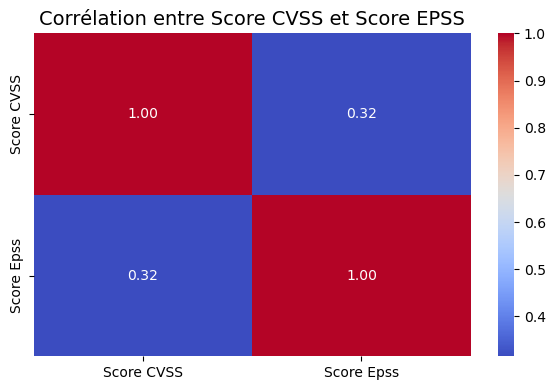

In [155]:
#%% 5 Heatmap des corrélations entre CVSS et EPSS :
import seaborn as sns
# Nettoyage des données : convertir en numérique
df["Score CVSS"] = pd.to_numeric(df["Score CVSS"], errors="coerce")
df["Score Epss"] = pd.to_numeric(df["Score Epss"], errors="coerce")

# Filtrer pour conserver uniquement les lignes valides
df_valid = df.dropna(subset=["Score CVSS", "Score Epss"])

# Calcul de la corrélation
correlation_matrix = df_valid[["Score CVSS", "Score Epss"]].corr()

# Création de la heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

# Ajouter des titres et labels
plt.title("Corrélation entre Score CVSS et Score EPSS", fontsize=14)
plt.tight_layout()

# Afficher la heatmap
plt.show()

# Interprétation:
On remarque qu'il y a une  corrélation peu importante de 32 %  entre les CVSS ou les Epss .
Cela signifie que lorsque le score CVSS augmente, le score EPSS a tendance à augmenter également.
Une vulnérabilité ayant un score CVSS élevé n'aura pas nécessairement un score EPSS élevé, et vice versa. 
On peut donc suggérer que ces deux méthodes prennent en compte des facteurs différents pour évaluer le risque d'une vulnérabilité.

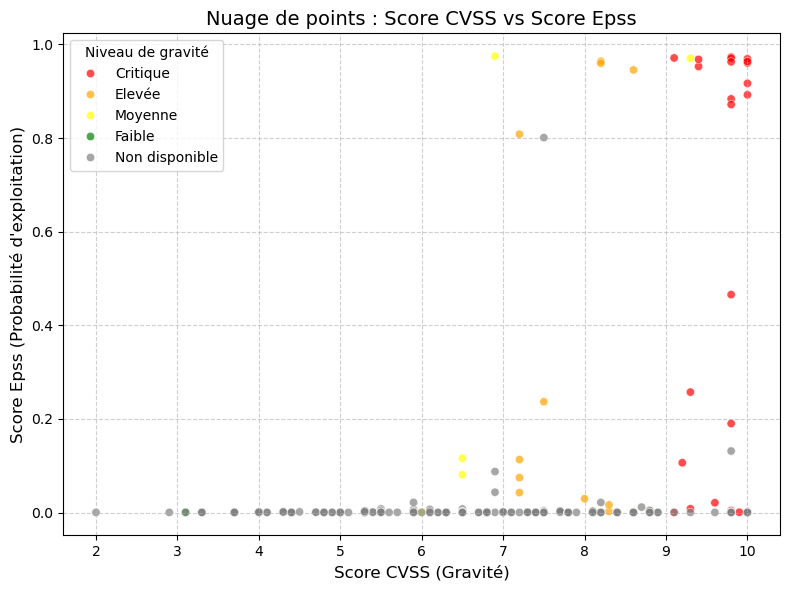

In [158]:
#%% 6 Nuage de points entre Score CVSS et Score EPSS

# Nettoyage des données : convertir en numérique
df["Score CVSS"] = pd.to_numeric(df["Score CVSS"], errors="coerce")
df["Score Epss"] = pd.to_numeric(df["Score Epss"], errors="coerce")

# Filtrer pour conserver uniquement les lignes valides
df_valid = df.dropna(subset=["Score CVSS", "Score Epss"])

# Mettre à jour la palette pour inclure "Non disponible"
palette = {
    "Faible": "green",
    "Moyenne": "yellow",
    "Elevée": "orange",
    "Critique": "red",
    "Non disponible": "gray"  # Ajout de couleur pour "Non disponible"
}

# Création du nuage de points
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_valid,
    x="Score CVSS",
    y="Score Epss",
    hue="Base severity",  # Ajouter une distinction par gravité
    palette=palette,
    alpha=0.7
)

# Ajouter des titres et labels
plt.title("Nuage de points : Score CVSS vs Score Epss", fontsize=14)
plt.xlabel("Score CVSS (Gravité)", fontsize=12)
plt.ylabel("Score Epss (Probabilité d'exploitation)", fontsize=12)
plt.legend(title="Niveau de gravité", loc="upper left", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)

# Afficher le graphique
plt.tight_layout()
plt.show()

# Interprétation graphique :

Les vulnérabilités avec un score CVSS élevé (entre 9 et 10) et un score EPSS proche de 1 (en haut à droite du graphique) présentent un risque très élevé.Les vulnérabilités avec un score CVSS moyen ou faible et un score EPSS proche de 0 sont moins préoccupantes.

# Actions prioritaires :

Traiter en priorité Celles ayant un score CVSS entre 9 et 10 et un score EPSS élevé doivent être traitées en priorité. Ces vulnérabilités présentent le plus grand risque d'exploitation en Appliquant immédiatement les correctifs ou mises à jour de sécurité et en Bloquant l'accès aux systèmes vulnérables jusqu'à résolution.

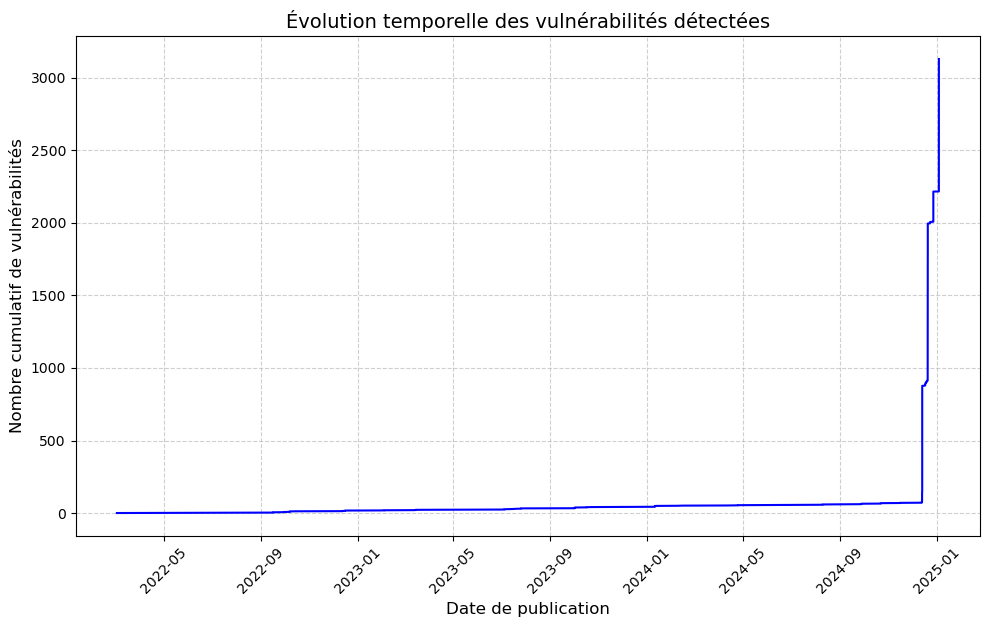

In [160]:
#%%7 évolution temporelle vulnérabilité

# Assurez-vous que la colonne "Date de publication" est au format datetime
df["Date de publication"] = pd.to_datetime(df["Date de publication"], errors='coerce')

# Filtrer les lignes avec une date valide
df_valid_dates = df.dropna(subset=["Date de publication"])

# Trier les données par date de publication
df_valid_dates = df_valid_dates.sort_values("Date de publication")

# Calculer le nombre cumulatif de vulnérabilités par date
df_valid_dates["Vulnérabilités cumulées"] = range(1, len(df_valid_dates) + 1)

# Tracer la courbe cumulative
plt.figure(figsize=(10, 6))
plt.plot(df_valid_dates["Date de publication"], df_valid_dates["Vulnérabilités cumulées"], color='blue')

# Ajouter des titres et labels
plt.title("Évolution temporelle des vulnérabilités détectées", fontsize=14)
plt.xlabel("Date de publication", fontsize=12)
plt.ylabel("Nombre cumulatif de vulnérabilités", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Afficher le graphique
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Interprétation graphique:

Faible augmentation initiale  De 2022 à mi-2024, la détection des vulnérabilités progresse lentement.
Explosion soudaine Après mi-2024, il y a une accélération marquée avec une forte croissance jusqu'à début 2025. Cela peut être lié à une intensification des menaces, une amélioration des capacités de détection ou une publication massive de vulnérabilités.

# Actions prioritaires :

Une évolution technologique entraînant plus de failles.Une amélioration des méthodes de détection.
Des vagues d'attaques exploitant des vulnérabilités nouvelles.
Renforcer la gestion des vulnérabilités et mettre en place un processus rigoureux de priorisation des vulnérabilités, comme basé sur leur gravité (score CVSS) et leur exploitabilité (score EPSS).Accroître les ressources dédiées à la gestion de la sécurité pour répondre à la hausse des vulnérabilités.


C:\Users\Tehin\AppData\Local\Temp\ipykernel_18344\2298767437.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_editeurs, x="Editeur", y="Score CVSS", palette="Set2")


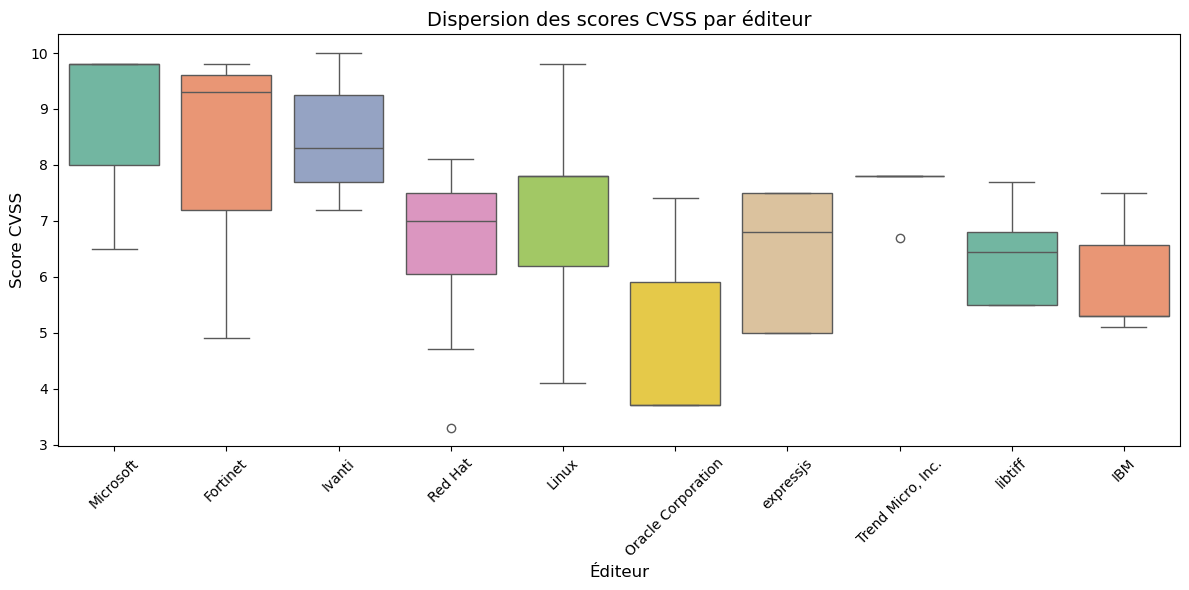

In [162]:
#%% 8 dispersion

# Assurez-vous que la colonne "Score CVSS" est au format numérique (float ou int)
df["Score CVSS"] = pd.to_numeric(df["Score CVSS"], errors='coerce')

# Filtrer les éditeurs et leurs scores CVSS
df_editeur_cvss = df[['Editeur', 'Score CVSS']].dropna(subset=["Score CVSS"])

# Compter le nombre de vulnérabilités par éditeur pour identifier les éditeurs les plus affectés
editeur_counts = df_editeur_cvss["Editeur"].value_counts()

# Garder les éditeurs les plus affectés (par exemple, les 10 premiers éditeurs)
top_editeurs = editeur_counts.head(10).index

# Filtrer pour ne garder que les données des éditeurs les plus affectés
df_top_editeurs = df_editeur_cvss[df_editeur_cvss["Editeur"].isin(top_editeurs)]

# Créer le boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_editeurs, x="Editeur", y="Score CVSS", palette="Set2")

# Ajouter des titres et labels
plt.title("Dispersion des scores CVSS par éditeur", fontsize=14)
plt.xlabel("Éditeur", fontsize=12)
plt.ylabel("Score CVSS", fontsize=12)
plt.xticks(rotation=45)  # Pour une meilleure lisibilité des noms d'éditeurs

# Afficher le graphique
plt.tight_layout()
plt.show()

# Interprétation graphique :

les Scores CVSS concentrés autour de valeurs élevées (8-10), montrant des vulnérabilités critiques pour ces éditeurs.Grande dispersion des scores, indiquant des vulnérabilités avec des niveaux de gravité variés (de faible à critique).La majorité des scores CVSS sont plus faibles par rapport aux autres éditeurs, avec une large dispersion.Scores concentrés sur une plage réduite, mais globalement plus bas comparés à des éditeurs comme Microsoft.Variabilité modérée des scores avec des médianes légèrement inférieures à Microsoft ou Fortinet.

# Actions prioritaires :

Prioriser les audits de sécurité et la remédiation pour Microsoft et Fortinet, car leurs vulnérabilités sont majoritairement critiques.Analyse approfondie des éditeurs à forte dispersion (Linux, Ivanti) en identifiant les causes des vulnérabilités avec des scores variés pour mieux cibler les efforts de correction.

C:\Users\Tehin\AppData\Local\Temp\ipykernel_18344\4219251700.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_cwe, x='Type CWE', y='Score CVSS', palette="Set2")


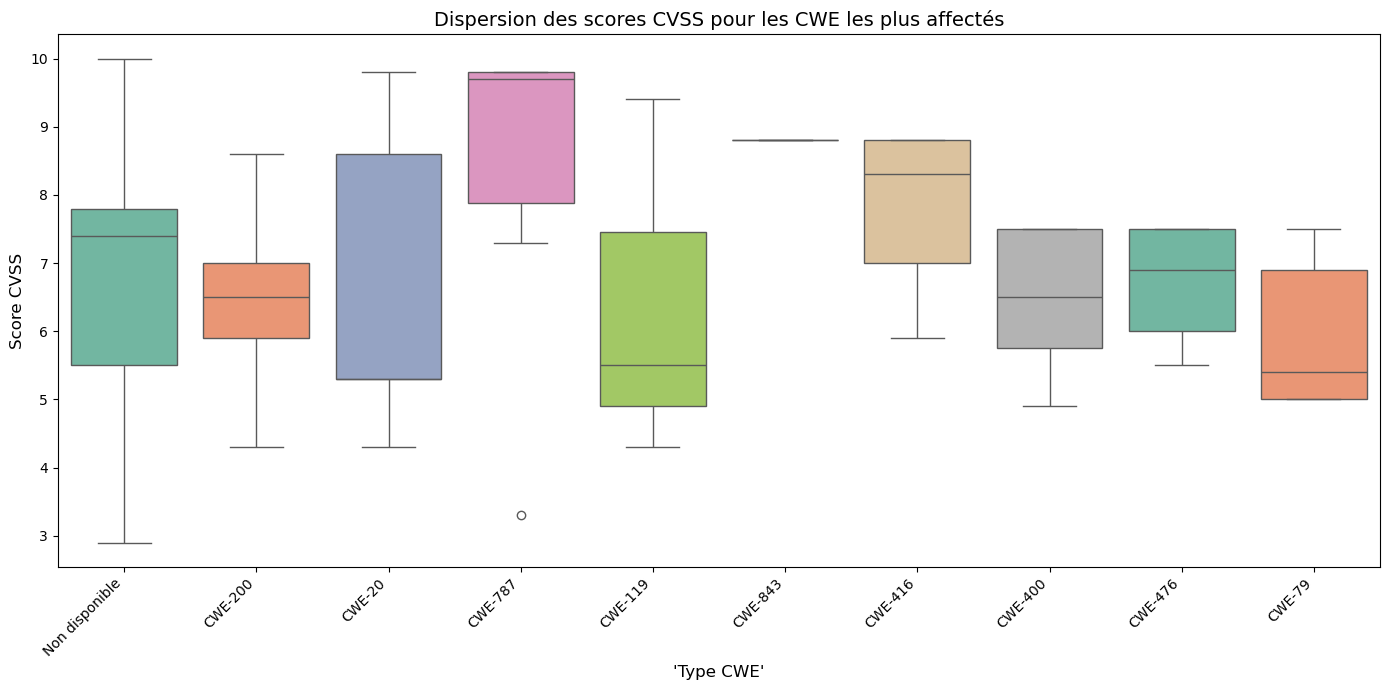

In [164]:
#%% 9A Des visualisations su CVSS pour un type défini CWE

# Filtrer les données pour un type de CWE spécifique

# Convertir les scores CVSS en valeurs numériques (si nécessaire)
df['Score CVSS'] = pd.to_numeric(df['Score CVSS'], errors='coerce')

# Filtrer les éditeurs les plus affectés (par exemple, top 10)
top_cwe = df['Type CWE'].value_counts().head(10).index
df_top_cwe = df[df['Type CWE'].isin(top_cwe)]

# Créer un boxplot des scores CVSS par éditeur
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_top_cwe, x='Type CWE', y='Score CVSS', palette="Set2")

# Ajouter des titres et des labels
plt.title("Dispersion des scores CVSS pour les CWE les plus affectés", fontsize=14)
plt.xlabel("'Type CWE'", fontsize=12)
plt.ylabel("Score CVSS", fontsize=12)

# Ajuster la rotation des labels de l'axe des x
plt.xticks(rotation=45, ha="right")

# Afficher le graphique
plt.tight_layout()
plt.show()

# Interprétation graphique :

Les CWE comme CWE-416 et CWE-787 ont les scores CVSS les plus élevés et présentent des risques critiques pour la sécurité.Les autres CWE (CWE-119, CWE-20) montrent des scores modérés, mais leur occurrence reste significative.

# Actions prioritaires :

CWE-416 doit être prioritaire, car les scores sont élevés et impactent gravement la sécurité des systèmes.CWE-787 a besoin d'etre renforcer la gestion de la mémoire et le développement  des contre-mesures pour éviter ces erreurs.Réduction des vulnérabilités modérées CWE-20 (Validation incorrecte des entrées) : Revoir les mécanismes de validation des données d’entrée pour limiter ces problèmes.CWE-79 (Exécution de scripts non sécurisés) : Mettre en place des contrôles stricts pour prévenir les attaques XSS.


C:\Users\Tehin\AppData\Local\Temp\ipykernel_18344\2668031141.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_cwe, x='Type CWE', y='Score Epss', palette="Set2")


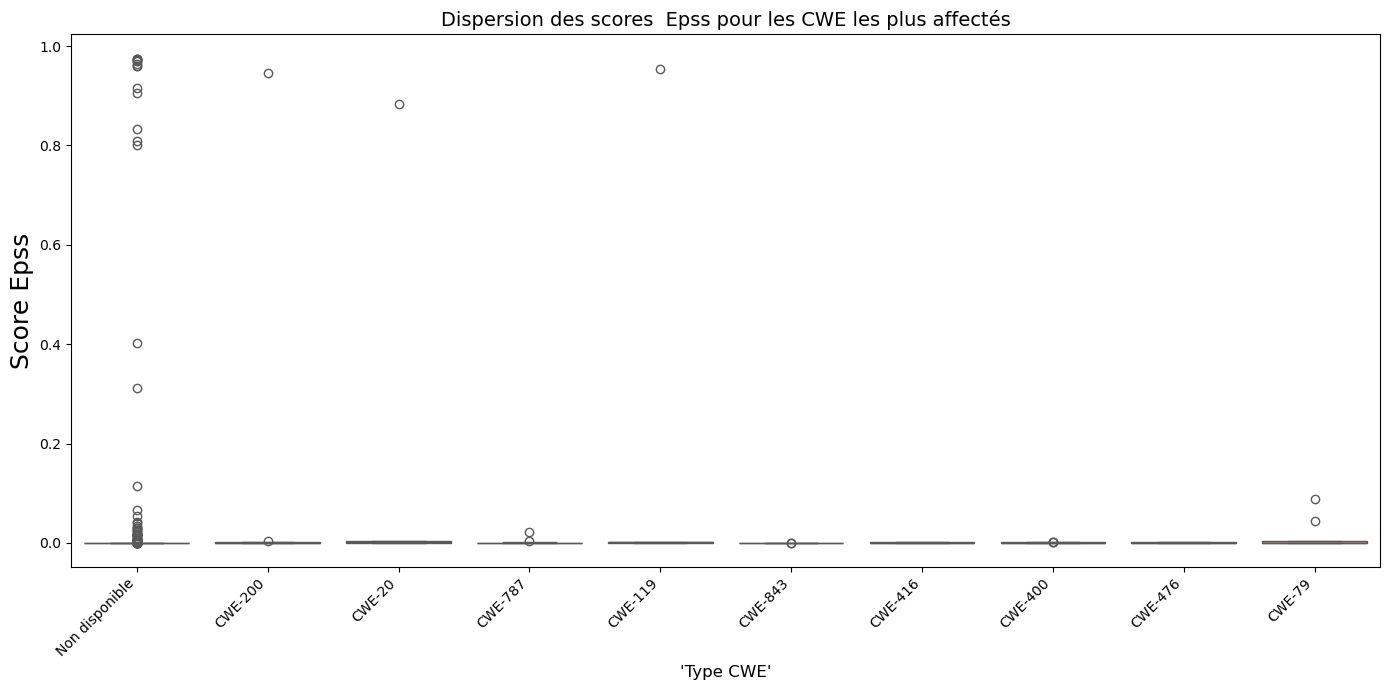

In [166]:
#%% 9B Des visualisations d'Epss pour un type défini CWE

# Filtrer les données pour un type de CWE spécifique

# Convertir les scores CVSS en valeurs numériques (si nécessaire)
df['Score Epss'] = pd.to_numeric(df['Score Epss'], errors='coerce')

# Filtrer les éditeurs les plus affectés (par exemple, top 10)
top_cwe = df['Type CWE'].value_counts().head(10).index
df_top_cwe = df[df['Type CWE'].isin(top_cwe)]

# Créer un boxplot des scores CVSS par éditeur
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_top_cwe, x='Type CWE', y='Score Epss', palette="Set2")

# Ajouter des titres et des labels
plt.title("Dispersion des scores  Epss pour les CWE les plus affectés", fontsize=14)
plt.xlabel("'Type CWE'", fontsize=12)
plt.ylabel("Score Epss", fontsize=18)

# Ajuster la rotation des labels de l'axe des x
plt.xticks(rotation=45, ha="right")

# Afficher le graphique
plt.tight_layout()
plt.show()




# Interprétation graphique :

La majorité des scores EPSS sont faibles (< 0.1), sauf pour des cas spécifiques dans la catégorie "Non disponible" et certains CWE comme CWE-79.Cela pourrait indiquer que, bien que ces vulnérabilités existent, leur exploitation reste improbable pour la majorité des cas.

# Actions prioritaires :

Analyser les vulnérabilités avec scores EPSS élevés , pour ceux qui sont non disponible il faut Prioriser l'identification et l'analyse des vulnérabilités non catégorisées ayant des scores EPSS proches de 1. Ces cas représentent un risque immédiat.Et pour CWE-79 il faut évaluer les systèmes pour détecter et corriger ces vulnérabilités, car certaines peuvent avoir une probabilité notable d'exploitation.Bien que les scores EPSS pour la plupart des CWE soient faibles, les quelques exceptions (valeurs > 0.5) nécessitent une attention particulière,
c'est à dire mettre en place des correctifs ou des mesures d'atténuation pour ces cas spécifiques.





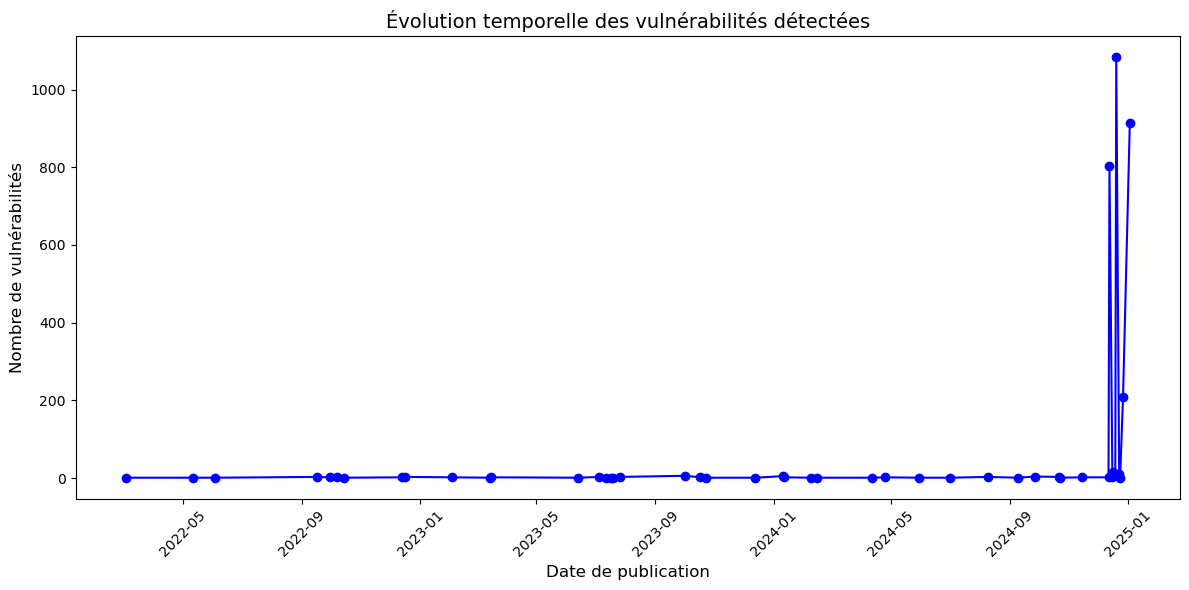

In [168]:
#%%10 évolution temporelle du nombre de vulnérabilités détectées

# Assurez-vous que la colonne "Date de publication" est au format datetime
df["Date de publication"] = pd.to_datetime(df["Date de publication"], errors='coerce')

# Grouper les données par date et compter le nombre de vulnérabilités par jour
vuln_per_date = df.groupby(df['Date de publication'].dt.date).size()

# Créer un graphique de l'évolution temporelle des vulnérabilités
plt.figure(figsize=(12, 6))
vuln_per_date.plot(kind='line', color='blue', marker='o')

# Ajouter des titres et labels
plt.title("Évolution temporelle des vulnérabilités détectées", fontsize=14)
plt.xlabel("Date de publication", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)

# Ajouter des labels pour améliorer la lisibilité (si nécessaire)
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()

# Interprétation
- Une hausse soudaine et massive des vulnérabilités est observée fin 2024, culminant en janvier 2025. 
- Cela pourrait refléter une intensification des menaces, une publication groupée de découvertes ou une amélioration des capacités de détecti

# Actions prioritaires:
Analyse approfondie des vulnérabilité récentesidents.  

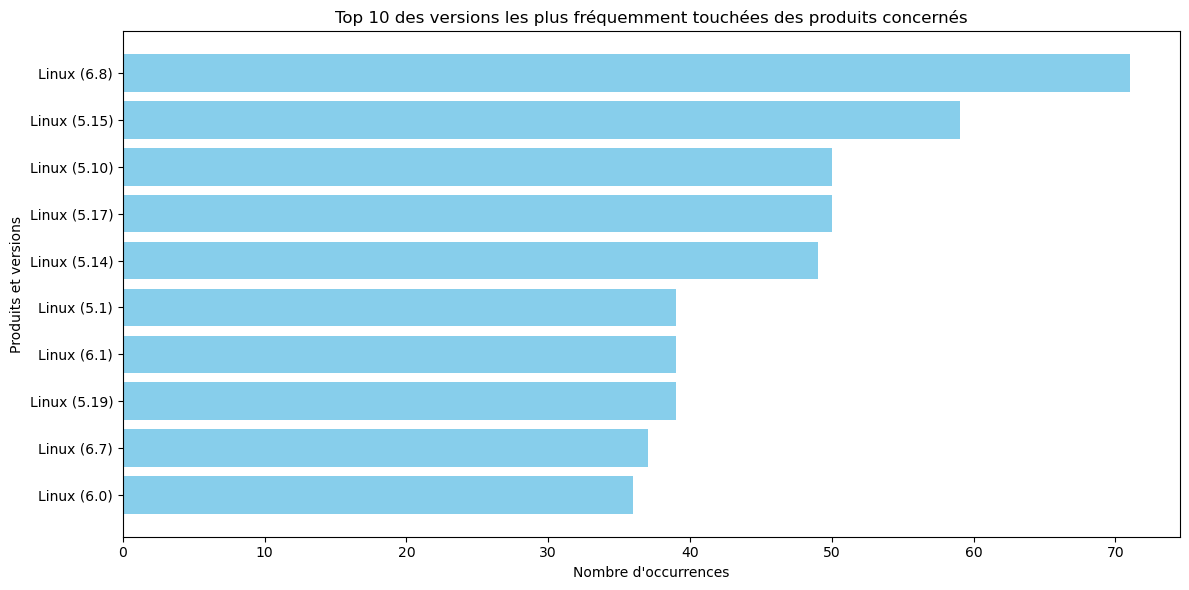

In [174]:
#%%11  Visualiser les versions les plus fréquemment touchées des produits concernés. 

#print(df["Versions affectées "])

# S'assurer que la colonne "Versions affectées" est sous forme de liste
df['Versions affectées '] = df['Versions affectées '].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Exploser les versions affectées pour chaque produit
df_exploded = df.explode('Versions affectées ')

# Regrouper les données pour compter les occurrences
version_counts = df_exploded.groupby(['Produit', 'Versions affectées ']).size().reset_index(name='Count')

# Trier par le nombre d'occurrences décroissant
version_counts = version_counts.sort_values(by='Count', ascending=False)

# Filtrer les 10 premières versions les plus touchées
top_versions = version_counts.head(10)

# Préparer les données pour le graphique
products = top_versions['Produit'] + " (" + top_versions['Versions affectées '] + ")"
counts = top_versions['Count']

# Créer le graphique
plt.figure(figsize=(12, 6))
plt.barh(products, counts, color='skyblue')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Produits et versions')
plt.title('Top 10 des versions les plus fréquemment touchées des produits concernés')
plt.gca().invert_yaxis()  # Inverser l'axe Y pour afficher le produit avec le plus grand nombre en haut
plt.tight_layout()

# Afficher le graphique
plt.show()

    

# Interprétation graphique :

Les versions spécifiques de *Linux* (6.8, 5.15, 5.17, etc.) sont particulièrement concernées par un grand nombre de vulnérabilités.
Cela indique que *Linux* peut être une cible prioritaire pour des cyberattaques, notamment en fonction des versions spécifiques.
Les versions les plus touchées (6.8, 5.15) devraient être considérées comme prioritaires pour des mesures correctives.

# Actions prioritaires :
Prioriser les correctifs et les mises à jour pour ces versions spécifiques de *Linux*.
Une analyse approfondie des vulnérabilités affectant ces versions est essentielle pour comprendre leur origine et leur gravité.



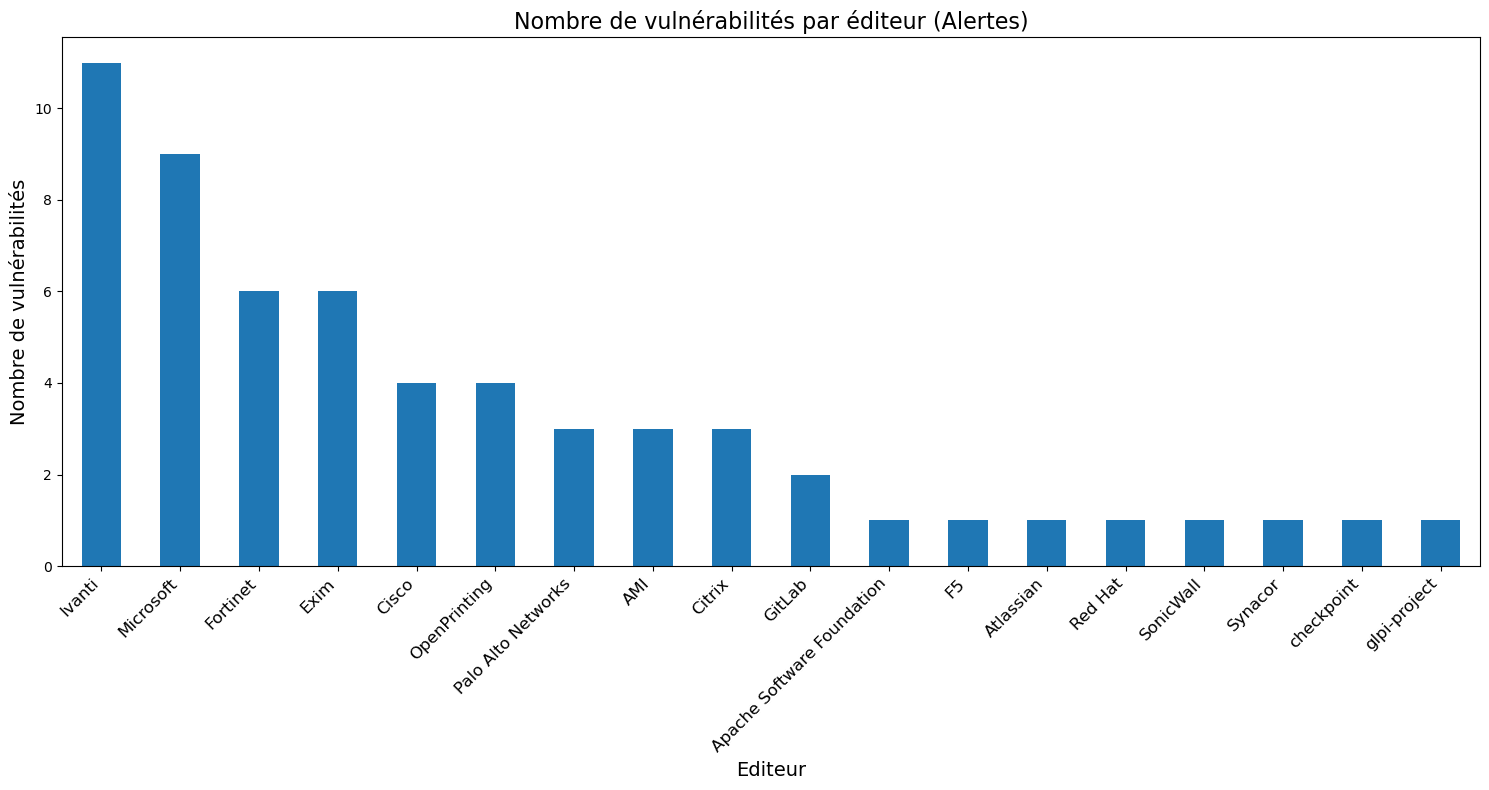

In [177]:
#%% 12 nombre de vulnérabilités par éditeur et distinguer les types de bulletins 


# Filtrer les données pour ne conserver que les lignes où "Type de bulletin" est "alerte"
alertes_df = df[df["Type de bulletin"].str.strip().str.lower() == "alerte"]

# Regrouper les données par "Editeur" et compter le nombre de vulnérabilités
vuln_counts = alertes_df.groupby("Editeur").size()

# Créer un graphique à barres
plt.figure(figsize=(15, 8))
vuln_counts.sort_values(ascending=False).plot(kind='bar', color='#1f77b4')

# Ajouter des titres et des labels
plt.title("Nombre de vulnérabilités par éditeur (Alertes)", fontsize=16)
plt.xlabel("Editeur", fontsize=14)
plt.ylabel("Nombre de vulnérabilités", fontsize=14)

# Ajuster la rotation des labels de l'axe des x
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()

# Afficher le graphique
plt.show()


# Interprétation :

*Ivanti*, *Microsoft*, et *Fortinet* dominent en termes de nombre d'alertes.
Cela reflète une concentration des menaces sur ces éditeurs, probablement en raison de leur popularité ou de leur adoption généralisée dans les entreprises.
D'autres éditeurs tels que *Cisco* et *Palo Alto Network*s figurent également parmi les éditeurs ayant un nombre significatif d’alertes.

# Actions prioritaires :
Prioriser les mesures de sécurité sur les solutions *Ivanti*, *Microsoft*, et *Fortinet*.


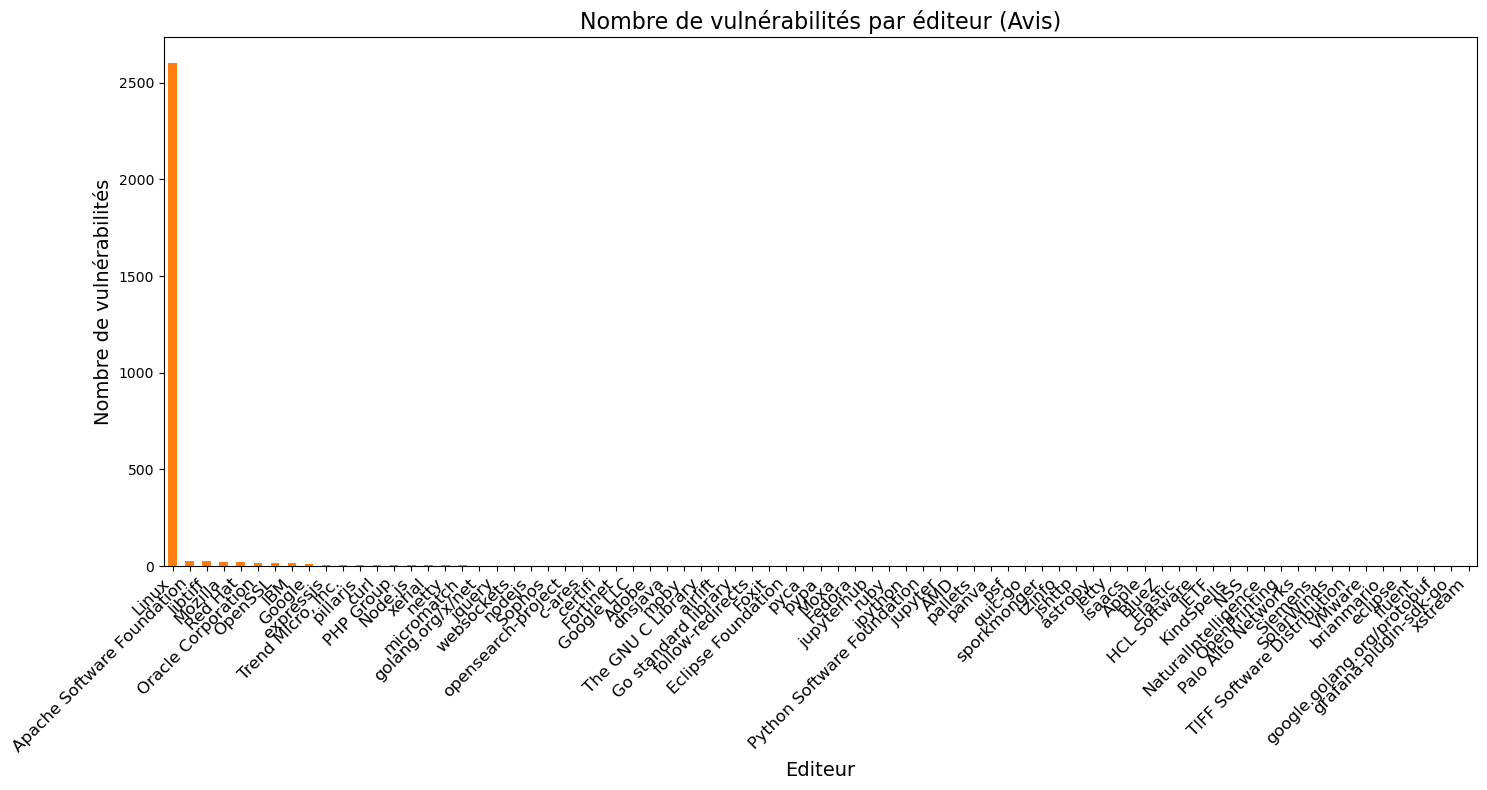

In [181]:
# Filtrer les données pour ne conserver que les lignes avec "avis"
avis_df = df[df["Type de bulletin"].str.strip().str.lower() == "avis"]

# Regrouper les données par "Editeur" et compter le nombre de vulnérabilités
avis_counts = avis_df.groupby("Editeur").size()

# Créer un graphique à barres
plt.figure(figsize=(15, 8))
avis_counts = avis_counts.sort_values(ascending=False)

# Vérifier si des données existent avant de tracer
if not avis_counts.empty:
    avis_counts.plot(kind='bar', color='#ff7f0e')  # Couleur différente pour les "avis"
    plt.title("Nombre de vulnérabilités par éditeur (Avis)", fontsize=16)
    plt.xlabel("Editeur", fontsize=14)
    plt.ylabel("Nombre de vulnérabilités", fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("Aucune donnée à afficher pour les avis.")


# Interprétation :

Une majorité écrasante des vulnérabilités de *Linux*.
Les autres éditeurs, tels que *Apache Software Foundation*, *Mozilla*, *Oracle Corporation*, etc., présentent un nombre de vulnérabilités bien inférieur.
Ce résultat met en lumière la nécessité de focaliser les efforts de sécurité sur l’écosystème *Linux*, sans négliger les autres éditeurs.

# Actions prioritaires :

Renforcer les audits de sécurité et les mécanismes de protection autour des environnements *Linux*.
Identifier les points communs dans les vulnérabilités des autres éditeurs pour des solutions généralisées.

C:\Users\Tehin\AppData\Local\Temp\ipykernel_18344\573177033.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_editeurs, x='Editeur', y='Score CVSS', palette="Set2")


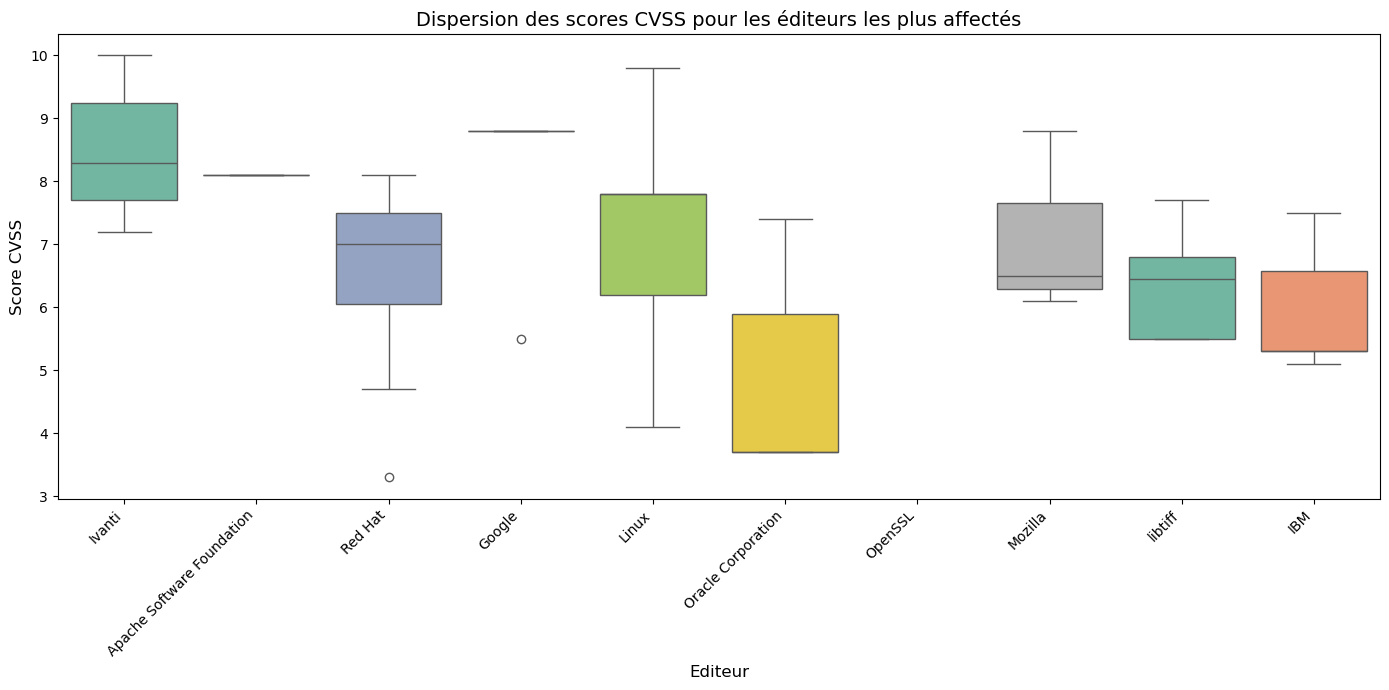

In [179]:
#%% 13 Montrer la dispersion des scores CVSS pour les éditeurs les plus affectés. 


# Exemple de DataFrame df contenant les colonnes "Editeur" et "Score CVSS"
# df = pd.DataFrame(...)

# Convertir les scores CVSS en valeurs numériques (si nécessaire)
df['Score CVSS'] = pd.to_numeric(df['Score CVSS'], errors='coerce')

# Filtrer les éditeurs les plus affectés (par exemple, top 10)
top_editeurs = df['Editeur'].value_counts().head(10).index
df_top_editeurs = df[df['Editeur'].isin(top_editeurs)]

# Créer un boxplot des scores CVSS par éditeur
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_top_editeurs, x='Editeur', y='Score CVSS', palette="Set2")

# Ajouter des titres et des labels
plt.title("Dispersion des scores CVSS pour les éditeurs les plus affectés", fontsize=14)
plt.xlabel("Editeur", fontsize=12)
plt.ylabel("Score CVSS", fontsize=12)

# Ajuster la rotation des labels de l'axe des x
plt.xticks(rotation=45, ha="right")

# Afficher le graphique
plt.tight_layout()
plt.show()

# Interprétation :

Ivanti affiche les scores CVSS les plus élevés, indiquant des vulnérabilités critiques à très haut risque.
Oracle Corporation, bien qu'ayant des scores très variés, montre des vulnérabilités de gravité relativement élevée.
*Linux* et *Mozilla* ont une dispersion modérée, suggérant une gravité mixte des vulnérabilités.
Red Hat présente des vulnérabilités de gravité plus faible par rapport aux autres éditeurs.

# Actions prioritaires :
Les vulnérabilités critiques d’Ivanti doivent être corrigées en priorité.
Les éditeurs ayant des vulnérabilités de gravité moyenne à élevée (comme *Linux*, *Oracle Corporation* et *Mozilla*) nécessitent également des contrôles renforcés.
